In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot

dataX = pd.read_fwf('uWaveGestureLibrary_X_TRAIN_tx.txt',header=None)
dataY = pd.read_fwf('uWaveGestureLibrary_Y_TRAIN_tx.txt',header=None)
dataZ = pd.read_fwf('uWaveGestureLibrary_Z_TRAIN_tx.txt',header=None)

I read the data for each axis.

In [2]:
df = pd.DataFrame(columns = ['time series id','time index','X','Y','Z','class'] ) 
newdf=df
for i in range(0,len(dataX)):
    newdf['X']=dataX.iloc[i,1:]
    newdf['Y']=dataY.iloc[i,1:]
    newdf['Z']=dataZ.iloc[i,1:]
    newdf['time index'] = range(1,316)
    newdf['time series id'] = i+1
    newdf['class'] = dataX.iloc[i,0]
    df=pd.concat([df, newdf], axis=0, sort=False)
df=df.iloc[315:,:]

Then, I created a new data matrix (df) for which each row represent an observation from a time series at a particular time index. This is basically concatenation of observations from each axis based on time index and the time series id. And the last column is the class.

In [3]:
X=np.mean(df['X'])
Y=np.mean(df['Y'])
Z=np.mean(df['Z'])

I found the mean of acceleration values for X, Y and Z axis.

In [6]:
thisdict={}
for i in range(1,9):
    thisdict[i]=[]
    same_class_observations=df.loc[df.iloc[:,5]==i]
    features = ['X', 'Y', 'Z']
    x = same_class_observations.loc[:, features].values
    pca = PCA(n_components=1)
    pca.fit(x)
    components=(pca.components_)
    thisdict[i].append(components) 
    explained_variance=pca.explained_variance_ratio_
    thisdict[i].append(explained_variance)                 
print(thisdict)

{1: [array([[0.35679434, 0.6911427 , 0.62850582]]), array([0.46253306])], 2: [array([[0.45541761, 0.68455467, 0.56919215]]), array([0.51254787])], 3: [array([[ 0.67472328,  0.53068805, -0.51295097]]), array([0.54074403])], 4: [array([[ 0.68063228,  0.63420651, -0.36677214]]), array([0.55012869])], 5: [array([[0.39887719, 0.64259   , 0.65419804]]), array([0.6472234])], 6: [array([[-0.2060269 ,  0.67972303,  0.70393858]]), array([0.57182387])], 7: [array([[0.22902999, 0.71502583, 0.66051746]]), array([0.5192033])], 8: [array([[0.57443435, 0.69279232, 0.43596328]]), array([0.61342685])]}


I filtered the data for each class and performed PCA eight times. I reported PCA results (components, variance covered by each component) for each class using a dictionary. For example, the components and explained variance for class 1 are represented in this dictionary as "1: [array([[0.35679434, 0.6911427 , 0.62850582]]), array([0.46253306])]".

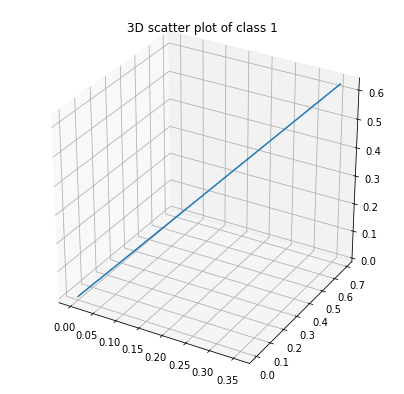

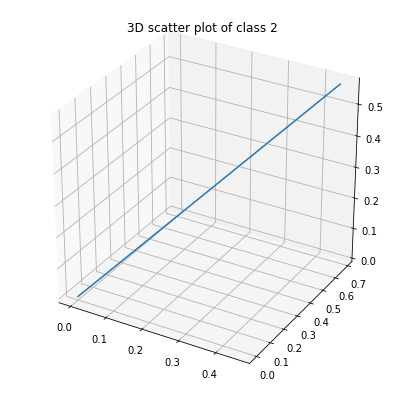

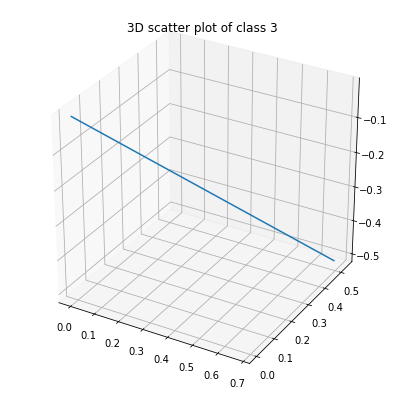

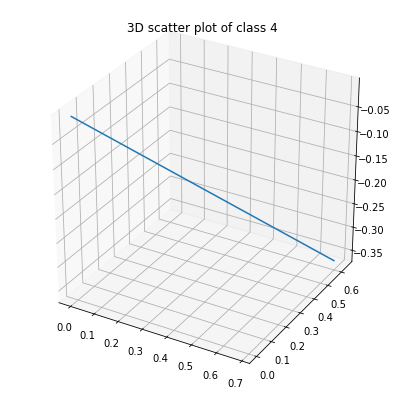

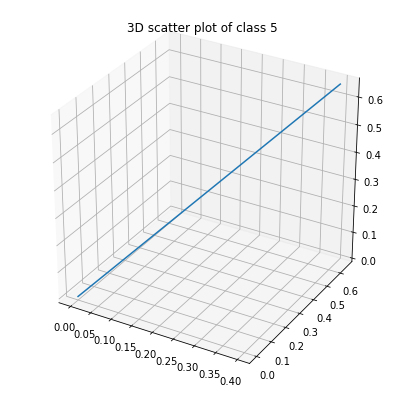

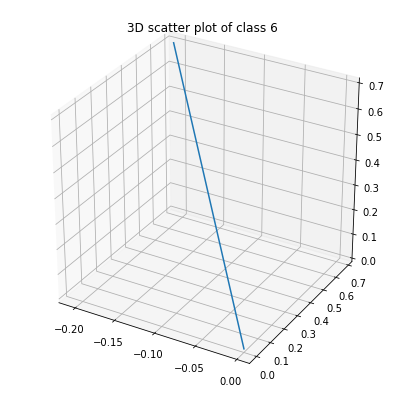

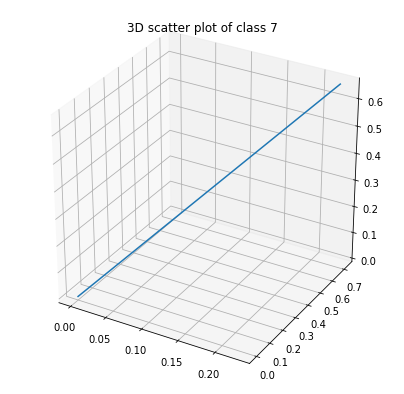

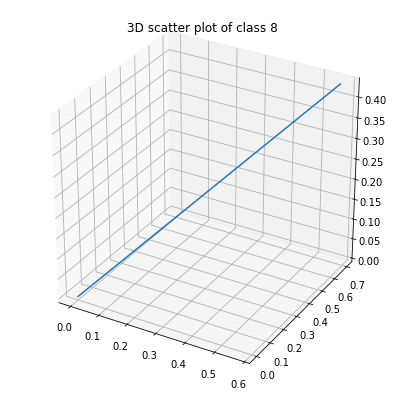

In [5]:
for i in range(1,9):
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes(projection ="3d")
    #Creating plot
    ax.plot3D([X,thisdict[i][0][0,0]], [Y,thisdict[i][0][0,1]], [Z,thisdict[i][0][0,2]])
    plt.title('3D scatter plot of class %s' %i)
    plt.show()

Then, I plotted components of PCA for each class in 3D to see the first components of each class are similar or not. By looking at plot 1,2 and 5, we can conclude that the components of PCA for class 1,2 and 5 are very similar. In addition, at the beginning of this task, I was expecting the components of PCA for class 7 and 8 similar since the corresponding gestures for class 7 and 8 show similar distribution but in opposite directions. And the plots for class 7 and 8 agree with my intiution since they have similar components of PCA. The same thing is true for class 3 and 4. 